In [8]:
import os
import pandas as pd
import seaborn as sns

df = pd.DataFrame()

dirs = os.listdir("results")
dirs.sort()
for dir in dirs:
    df_dir = pd.read_csv(f"results/{dir}/matching_result.csv")
    df_dir_male = pd.read_csv(f"dataset/{dir}/male.csv")
    df_dir_female = pd.read_csv(f"dataset/{dir}/female.csv")
    df_dir_male_pref_rank = pd.read_csv(f"results/{dir}/male_pref_rank.csv")
    df_dir_female_pref_rank = pd.read_csv(f"results/{dir}/female_pref_rank.csv")

    df_dir["Male_inc"] = df_dir_male["V_inc"]
    df_dir["Male_apr"] = df_dir_male["V_apr"]
    df_dir["Male_age"] = df_dir_male["V_age"]
    df_dir["Male_per"] = df_dir_male["V_per"]

    df_dir = df_dir.sort_values("Female_idx").reset_index(drop=True)
    df_dir["Female_inc"] = df_dir_female["V_inc"]
    df_dir["Female_apr"] = df_dir_female["V_apr"]
    df_dir["Female_age"] = df_dir_female["V_age"]
    df_dir["Female_per"] = df_dir_female["V_per"]

    df_dir = df_dir.merge(df_dir_male_pref_rank, on="Male_idx")
    df_dir = df_dir.merge(df_dir_female_pref_rank, on="Female_idx")

    if df.empty:
        df = df_dir
    else:
        df = pd.concat([df, df_dir])

df.reset_index(drop=True, inplace=True)
df.drop(["Male_idx", "Female_idx"], axis=1, inplace=True)

/var/folders/c1/4qwvbdwd2yx4ht7qk_0_7nzh0000gq/T/ipykernel_73721/2873230570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_corr.loc[:, columns_to_negate] = -df_for_corr.loc[:, columns_to_negate]


<Axes: >

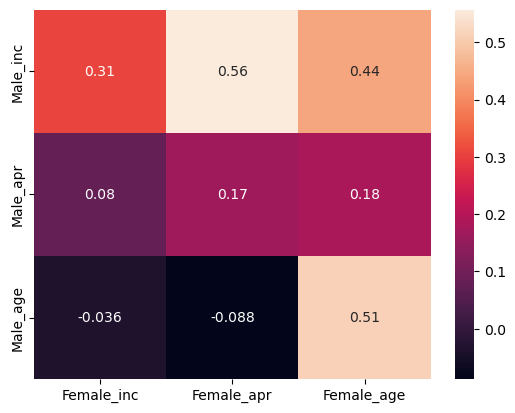

In [39]:
df_for_corr = df[["Male_inc", "Male_apr", "Male_age", "Female_inc", "Female_apr", "Female_age"]]
columns_to_negate = ["Male_age", "Female_age"]
df_for_corr.loc[:, columns_to_negate] = -df_for_corr.loc[:, columns_to_negate]
df_corr = df_for_corr.corr()
# delete rows Female_inc, Female_apr, Female_age
rows_to_delete = ["Female_inc", "Female_apr", "Female_age"]
df_corr = df_corr.drop(rows_to_delete)
columns_to_delete = ["Male_inc", "Male_apr", "Male_age"]
df_corr = df_corr.drop(columns_to_delete, axis=1)
sns.heatmap(df_corr, annot=True)

In [10]:
target_columns = ["Male_inc", "Male_apr", "Male_age", "Male_pref_rank", "Female_inc", "Female_apr", "Female_age", "Female_pref_rank"]

In [11]:
df[df["Male_inc"]==10]

,Male_inc,Male_apr,Male_age,Male_per,Female_inc,Female_apr,Female_age,Female_per,Male_pref_rank,Female_pref_rank
95,10,6,3,7.234278,6,8,3,7.160562,2,1
246,10,6,2,0.568031,2,8,2,0.938972,1,1
410,10,5,2,7.367880,4,7,2,7.665647,3,1
868,10,5,2,0.068037,8,8,2,0.030515,1,1
1015,10,4,2,3.897598,8,5,2,3.170261,2,2
...,...,...,...,...,...,...,...,...,...,...
47681,10,3,2,8.637079,6,9,2,8.799471,1,1
48481,10,2,3,9.141598,2,8,3,8.772573,3,1
48542,10,4,2,9.013945,4,9,2,8.638069,1,1
48788,10,4,8,4.713731,2,9,4,5.464001,7,6


In [44]:
df.loc[:, target_columns].groupby("Male_inc").mean()

,Male_apr,Male_age,Male_pref_rank,Female_inc,Female_apr,Female_age,Female_pref_rank
Male_inc,,,,,,,
1,5.308638,4.252620,280.536321,2.114926,4.351644,6.033610,216.912902
2,5.321167,4.233556,179.187729,2.215872,4.601520,4.609554,129.332489
4,5.310524,4.272033,70.852766,2.600785,5.367524,3.357569,57.153895
6,5.317657,4.206122,27.729991,3.131322,6.103283,2.806300,24.900887
8,5.255420,4.154133,9.691396,3.736789,7.074526,2.503726,8.420054
10,5.170000,4.200000,2.870000,4.470000,7.750000,2.310000,2.200000


In [13]:
df.loc[:, target_columns].groupby(["Male_inc","Male_apr"]).mean()

Male_age  Male_pref_rank  Female_inc  Female_apr  \
Male_inc Male_apr                                                     
1        1         3.785714      409.357143    2.000000    4.071429   
         2         4.088235      382.705882    1.970588    4.235294   
         3         4.441558      352.798701    2.116883    4.363636   
         4         4.100746      338.305970    2.046642    4.229478   
         5         4.485311      300.951821    2.180964    4.333725   
         6         4.236842      258.901662    2.077562    4.318560   
         7         3.943144      195.973244    2.076923    4.494983   
         8         3.951923      138.538462    2.221154    4.692308   
         9         4.463415      114.829268    2.365854    4.926829   
         10        3.666667       90.750000    2.416667    5.083333   
2        1         4.404255      345.840426    2.053191    4.446809   
         2         3.986547      301.376682    2.134529    4.237668   
         3         4.298067      277.557477    2.149542    4.275687   
         4         4.232077      239.721451    2.122981    4.353925   
         5         4.230451      188.762487    2.160524    4.492422   
         6         4.182144      141.774058    2.241735    4.715308   
         7         4.290670      116.231599    2.329583    4.947492   
         8         4.429972       93.106443    2.532213    5.168067   
         9         4.183673       72.600000    2.689796    5.310204   
         10        4.138889       50.208333    2.777778    5.527778   
4        1         4.157895      128.197368    2.157895    4.684211   
         2         4.564706      120.464706    2.323529    4.994118   
         3         4.300390      101.561769    2.472042    5.002601   
         4         4.312522       88.137065    2.510944    5.155005   
         5         4.230529       73.283865    2.528230    5.327605   
         6         4.282658       61.019110    2.640901    5.471763   
         7         4.282950       50.211004    2.804111    5.593712   
         8         4.233677       40.786942    2.883162    5.826460   
         9         4.181319       33.664835    2.956044    5.950549   
         10        4.160714       24.642857    3.482143    6.339286   
6        1         4.517241       65.413793    2.758621    5.396552   
         2         4.158273       44.438849    2.928058    5.589928   
         3         4.239063       42.817188    2.801563    5.671875   
         4         4.163198       35.353359    3.022233    5.796594   
         5         4.184419       28.358640    3.052691    6.048725   
         6         4.287300       24.166551    3.236641    6.196391   
         7         4.180578       18.069021    3.258427    6.500803   
         8         4.090909       13.950000    3.527273    6.688636   
         9         4.164773        9.250000    3.619318    7.017045   
         10        4.000000        8.266667    4.177778    7.155556   
8        1         5.272727       27.000000    3.227273    6.045455   
         2         3.875000       15.125000    3.825000    6.300000   
         3         4.351955       15.731844    3.363128    6.620112   
         4         4.307557       13.325132    3.458699    6.806678   
         5         4.092391        9.494565    3.732609    7.064130   
         6         4.159420        7.744401    3.823452    7.218709   
         7         4.038217        5.939490    4.070064    7.356688   
         8         3.932692        4.076923    4.317308    7.634615   
         9         3.285714        2.142857    3.942857    8.000000   
         10        4.800000        3.500000    3.600000    7.900000   
10       1         3.500000        2.500000    2.000000    7.500000   
         2         3.500000        3.000000    4.000000    7.500000   
         3         4.333333        3.333333    3.750000    7.500000   
         4         3.644444        2.822222    4.488889    7.844444   
         5         4.033333        2.550000

In [14]:
df.loc[:, target_columns].groupby("Female_apr").mean()

,Male_inc,Male_apr,Male_age,Male_pref_rank,Female_inc,Female_age,Female_pref_rank
Female_apr,,,,,,,
1,1.854839,4.475806,2.838710,315.794355,2.548387,4.012097,215.649194
2,1.969440,4.719864,3.066214,263.718166,2.645161,3.911715,193.981324
3,2.218717,4.909961,3.482099,205.605459,2.618575,3.746189,162.059199
4,2.689549,5.111523,4.017625,155.725108,2.632859,3.753556,127.836735
5,3.409339,5.268938,4.314681,112.843992,2.631836,3.770714,89.561033
6,4.335911,5.399066,4.478573,80.159175,2.614387,3.837039,53.651764
7,5.346809,5.620213,4.419858,49.895922,2.607270,3.802482,26.142908
8,6.275078,5.793175,4.239400,29.804550,2.666494,3.800414,13.043950
9,6.985251,5.986726,4.110619,18.026549,2.607670,3.774336,5.803835


In [15]:
df.loc[:, target_columns].groupby("Female_age").mean()

,Male_inc,Male_apr,Male_age,Male_pref_rank,Female_inc,Female_apr,Female_pref_rank
Female_age,,,,,,,
1,5.750000,5.717213,2.469262,18.631148,2.600410,5.252049,19.721311
2,4.773098,5.522690,2.734236,37.634762,2.632130,5.304312,40.024257
3,3.980358,5.418990,3.660029,67.391474,2.603548,5.288650,66.562817
4,3.507651,5.286926,4.934714,105.162176,2.623669,5.298985,90.948769
6,2.795841,5.102415,6.872317,204.702147,2.652504,5.303444,114.429562
8,2.118957,4.751041,6.205866,311.922325,2.636248,5.338222,179.503350
10,1.706721,4.505092,4.323829,397.938900,2.580448,5.362525,284.971487


In [42]:
df_tmp = df.loc[:, target_columns]
print(len(df_tmp[(df_tmp["Male_pref_rank"]<100) & (df_tmp["Female_pref_rank"]<100)]))

29314
